<a href="https://colab.research.google.com/github/SethDwumah/trial/blob/main/Amazon_Review_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re

In [4]:
# load the dataset
data = pd.read_csv("amazon_reviews.csv")
data.columns=['reviews','sentiments']

HTTPError: ignored

In [3]:
data.head()

NameError: ignored

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.isna().sum()

reviews        0
class_label    0
dtype: int64

In [ ]:
data['class_label'].value_counts()

1    500
0    500
Name: class_label, dtype: int64

### Data Preprocessing

Lets preprocess the reviews and remove puntuations, stopwords and convert to lower case

In [ ]:
# preprocessing function
from tqdm import tqdm
def preprocessing_text(text_data):
    preprocessed = []
    for word in tqdm(text_data):

    # remove punctuations
        word = re.sub(r'[^\w\s]',' ',word)

        preprocessed.append(' '.join(token.lower()
                                     for token in nltk.word_tokenize(word)
                                     if token not in stopwords.words('english')))
    return preprocessed


In [ ]:
preprocess_text = preprocessing_text(data['reviews'].values)
data['reviews'] = preprocess_text

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.59it/s]


In [ ]:
data.head()

,reviews,class_label
0,good case excellent value,1
1,great jawbone,1
2,tied charger conversations lasting 45 minutes ...,0
3,the mic great,1
4,i jiggle plug get line right get decent volume,0


In [ ]:
data['reviews'][:10].tolist()

['good case excellent value',
 'great jawbone',
 'tied charger conversations lasting 45 minutes major problems',
 'the mic great',
 'i jiggle plug get line right get decent volume',
 'if several dozen several hundred contacts imagine fun sending one one',
 'if razr owner must',
 'needless say i wasted money',
 'what waste money time',
 'and sound quality great']

Now the reviews has been preprocessed; there is no punctuations nor stopwords and also in lower case. We can now proceed to EDA

### Exploratory Data Analysis

In [ ]:
# lets look at the words that appeared most in the reviews
from nltk.probability import FreqDist

In [ ]:
words_count = FreqDist(data['reviews'])
words_count

FreqDist({'great phone': 6, 'works great': 4, 'disappointed': 3, 'if like loud buzzing override conversations phone': 2, 'don buy product': 2, 'i would recommend': 2, 'waste money': 2, 'this great deal': 2, 'great product price': 2, 'excellent product price': 2, ...})

In [ ]:
# most common words
words_count.most_common(10)

[('great phone', 6),
 ('works great', 4),
 ('disappointed', 3),
 ('if like loud buzzing override conversations phone', 2),
 ('don buy product', 2),
 ('i would recommend', 2),
 ('waste money', 2),
 ('this great deal', 2),
 ('great product price', 2),
 ('excellent product price', 2)]

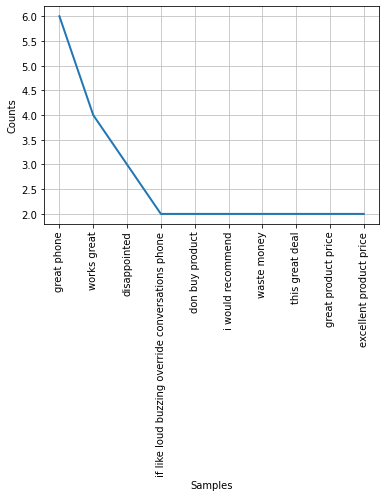

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
words_count.plot(10)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolid = ' '.join(
    word for word in data['reviews'][data['class_label']==1].astype(str))
fontpath = "C:/Users/Seth Dwumah/Downloads/07558_CenturyGothic.ttf"
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110, font_path=fontpath)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolid))
plt.axis('off')
plt.show

In [ ]:
all_words = [word for tokens in data['reviews'] for word in data['reviews']]
vocabs = [len(token) for token in data['reviews']]
print('%s is the total words'% (len(all_words)))
print('%s is the total vocabulary size'%(len(vocabs)))
sentence_length = sorted(list(set(vocabs)))
print('Max sentence length is %s' %(max(sentence_length)))

1000000 is the total words
1000 is the total vocabulary size
Max sentence length is 121


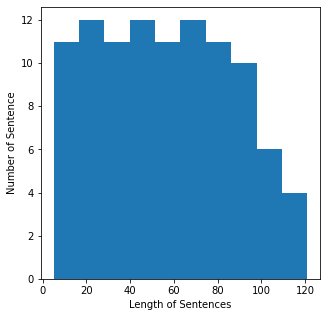

In [ ]:
# lets visualize the length of sentence
plt.figure(figsize=(5,5))
plt.hist(sentence_length)
plt.xlabel('Length of Sentences')
plt.ylabel('Number of Sentence')
plt.show()

## Preprocess the data for machine learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Apply TF-IDF to convert the data into vector form
vectorizer = TfidfVectorizer()
transformed_data = vectorizer.fit_transform(data['reviews']).toarray()

In [ ]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_data,data['class_label'],test_size=0.25,random_state=42)

## Model Development and Evaluation

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


### SVC

In [ ]:
# lets train the on SVC
svc = SVC(probability=True)
svc.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
svc_pred =svc.predict(x_test)

In [ ]:
# evaluation
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79       115
           1       0.92      0.64      0.75       135

    accuracy                           0.78       250
   macro avg       0.81      0.79      0.77       250
weighted avg       0.82      0.78      0.77       250



The Support Vector Classifier model is giving an accuracy of 78%.
Lets continue to try other classification algorithms

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# train the model
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [ ]:
# evaluation
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       115
           1       0.83      0.67      0.75       135

    accuracy                           0.75       250
   macro avg       0.76      0.76      0.75       250
weighted avg       0.77      0.75      0.75       250



XGBClassifier is also giving an accuracy of 72%

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=100)
lr.fit(x_train,y_train)
lr_pred =lr.predict(x_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       115
           1       0.93      0.66      0.77       135

    accuracy                           0.79       250
   macro avg       0.81      0.80      0.79       250
weighted avg       0.82      0.79      0.79       250



## Model Optimization --RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
LogisticRegression()

LogisticRegression()

In [ ]:
parameters = {'C':[0.1,0.5,0.01,1.0],
            'solver':['liblinear','lbfgs',None,'newton-cg','sag','saga'],
            'class_weight':['balanced',None]}

In [ ]:
tuned_lr = RandomizedSearchCV(lr, param_distributions=parameters, cv=5,verbose=10, n_jobs=-1,random_state=100)

In [ ]:
# train the LR tuned model
tuned_lr.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=100,
                                                solver='liblinear'),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.01, 1.0],
                                        'class_weight': ['balanced', None],
                                        'solver': ['liblinear', 'lbfgs', None,
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   random_state=100, verbose=10)

In [ ]:
tuned_lr.best_params_

{'solver': 'saga', 'class_weight': 'balanced', 'C': 1.0}

In [ ]:
tuned_lr.best_score_

0.8026666666666665

In [ ]:
# tuned model testing
tuned_lr_pred = tuned_lr.predict(x_test)

In [ ]:
print(classification_report(y_test,tuned_lr_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       115
           1       0.93      0.66      0.77       135

    accuracy                           0.79       250
   macro avg       0.81      0.80      0.79       250
weighted avg       0.82      0.79      0.79       250



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=123,criterion='gini',random_state=42 )
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       115
           1       0.92      0.61      0.73       135

    accuracy                           0.76       250
   macro avg       0.80      0.77      0.76       250
weighted avg       0.81      0.76      0.76       250



In [ ]:
# Optimize the model
from scipy.stats import randint
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
params = {'n_estimators':randint(100,1000),
         'criterion':[None,'gini','entropy','log_loss'],
         'max_depth':randint(1,9),
         'max_features':['sqrt','log2',None],
         'class_weight':['balanced','balanced_subsample']}

In [ ]:
tuned_rf =RandomizedSearchCV(rf,param_distributions=params,cv=5,verbose=10,n_jobs=-1,random_state=100)

In [ ]:
# Model fitting
tuned_rf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=123,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': [None, 'gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237B7C95190>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237B7C5D880>},
                   random_state=100, verbose=10)

In [ ]:
tuned_rf_pred = tuned_rf.predict(x_test)

In [ ]:
# Best parameters
tuned_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 515}

In [ ]:
tuned_rf.best_score_

0.768

In [ ]:
print(classification_report(y_test,tuned_rf_pred))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78       115
           1       0.91      0.62      0.74       135

    accuracy                           0.76       250
   macro avg       0.80      0.78      0.76       250
weighted avg       0.80      0.76      0.76       250



### VotingClassifier()

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
voting_clf =VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc)], voting='soft')

In [ ]:
# VotingClassifier Fitting
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=100,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=123,
                                                     random_state=42)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
# model testing
voting_pred = voting_clf.predict(x_test)

In [ ]:
voting_clf.score(x_test,y_test)

0.776

In [ ]:
print(classification_report(y_test,voting_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       115
           1       0.91      0.65      0.76       135

    accuracy                           0.78       250
   macro avg       0.80      0.79      0.77       250
weighted avg       0.81      0.78      0.77       250



From all the above machine learning algorithms used to train the dataset,LogisticRegression model performed better with an accuracy of 79%

#### Save the best model


In [ ]:
import pickle
# saving the model
pickle.dump(tuned_lr,open('model_LR.pkl','wb'))
pickle.dump(voting_clf,open('model_Voting.pkl','wb'))
# saving the TF-IDF vectorizer
pickle.dump(vectorizer,open('TfidfVectorizer.pkl','wb'))

In [ ]:
#Testing the model

def preprocess_text(text_data):
    sentence = re.sub(r'[\w\s]',' ',text_data)
    word = [' '.join(token.lower()
                     for token in nltk.word_tokenize(sentence)
                     if token not in stopwords.words('english'))]
    return word


In [ ]:
text ="this is great sound from the speaker"

prep = preprocess_text(text)
transf = vectorizer.transform(prep).toarray()
tuned_lr.predict(transf)

array([0], dtype=int64)